In [1]:
import mujoco
import mediapy as media
import numpy as np
import matplotlib.pyplot as plt
import math
from expert.controller import pid_controller as pid
from expert.trajectory_generator import polynomial_trajectory as traj
from expert.trajectory_config import Trajectory_config as config

In [2]:
model = mujoco.MjModel.from_xml_path("/home/waris/Desktop/desktop/robotics/courses/cs234/cdpr_project/model/sphereCDPR_2D.xml")

In [3]:
model

In [4]:
data = mujoco.MjData(model)
data.qpos

array([1.25, 0.75, 0.7 , 1.  , 0.  , 0.  , 0.  ])

In [5]:
renderer = mujoco.Renderer(model)

[1.25 0.75]
[1.29352131 0.74421132]


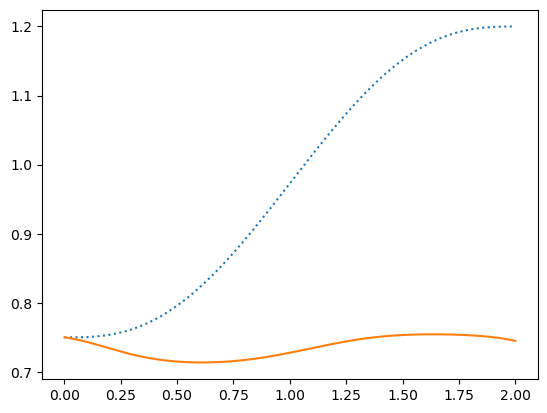

In [42]:
duration = 2  # (seconds)
framerate = 60
frames = []
time_step = 1.0 / framerate
radius = 0.4
omega = 0.5
trajectory = []
trajectory_des = []

velocity = []
vel_desired = []

acceleration = []
acc_desired = []
fnet=[]
mass = 0.5
mujoco.mj_resetData(model, data)
# data.ctrl = [0,0,0,0]
# data.qpos[:2] = [radius, radius]
# f_c = 0.5*omega*omega*radius
# data.qpos[:2] = config.x0
# mujoco.mj_step(model, data)

# renderer.update_scene(data)
# pixels = renderer.render()
# frames.append(pixels)

pd = pid(0.49, 0.604, config.m, config.l)
t_g_x = traj(1.25, 0, 0, 1.7, 0, 0, 0, duration)
t_g_y = traj(0.75, 0, 0, 1.2, 0, 0, 0, duration)
# print(config.x0)
print(data.qpos[:2])

try:
    while data.time < duration:
#         for i in range(4):
            # Adjust tendon lengths to follow circular path
#             theta_offset = i * (2 * np.pi / 4)  # Distribute tendons evenly around the circle
#         theta = omega * data.time
#         x = 1.25 + radius * np.cos(theta)
#         y = 0.75 + radius * np.sin(theta)
#             data.ctrl[i] = tendon_length
#             print([x,y])
#         fx = math.sqrt(f_c/(1+np.tan(theta)**2))
#         fy = fx*np.tan(theta)
#         data.qpos[:2] = [x, y]
#         trajectory.append([x,y])
#             print(data.qpos[:2])
#         print("check")
#         print(data.time)
#         print(data.time)
#         print("ok")
        pos = data.qpos[:2]
#         print("simulated")
#         print(pos)
        vel = data.qvel[:2]
        acc = data.qacc[:2]
        trajectory.append([pos[0],pos[1]])
        vel_desired.append([vel[0], vel[1]])
        acc_desired.append([acc[0], acc[1]])
        new_pos_x = t_g_x.calc_pos(data.time)
        new_vel_x= t_g_x.calc_vel(data.time)
        new_acc_x= t_g_x.calc_acc(data.time)
        new_pos_y = t_g_y.calc_pos(data.time)
        new_vel_y= t_g_y.calc_vel(data.time)
        new_acc_y= t_g_y.calc_acc(data.time)
#         print("desired")
#         print(new_pos_x, new_pos_y)
        trajectory_des.append([new_pos_x, new_pos_y])
        velocity.append([new_vel_x, new_vel_y])
        acceleration.append([new_acc_x, new_acc_y])
        fnet = pd.calc_input_sig(np.array([new_acc_x, new_acc_y],dtype=np.float64), np.array([new_vel_x, new_vel_y],dtype=np.float64), np.array([new_pos_x, new_pos_y],dtype=np.float64), pos, vel)
        W = pd.build_wrench_mat(pos[0], pos[1])
#         print(W.dtype)
        data.ctrl = pd.find_tensions(W, fnet)
#         print("tensions")
#         print(data.ctrl)
        
        mujoco.mj_step(model, data)
#         if data.time % time_step < 1e-10:

        renderer.update_scene(data)
#         fnet.append(data.ctrl)
#         print(data.ctrl)
        pixels = renderer.render()
        frames.append(pixels)
#         print("end")
#         print(data.time)
#         data.ctrl += 0.1
except StopIteration:
    print("exception")
    print(data.time)
    pass
print(data.qpos[:2])
media.show_video(frames, fps=framerate)
x = np.array(trajectory)
z = np.array(trajectory_des)
# x = np.array(acc_desired)
# z = np.array(acceleration)
# print(x)
# plt.plot(x[:,0], x[:,1])
q = np.linspace(0,2,200)
plt.plot( q, z[:,1], linestyle='dotted')
plt.plot(q, x[:,1])
# mujoco.mj_step(model,data)
# renderer.update_scene(data)
# media.show_image(renderer.render())